# Data Types

The object type is a general representation that is typically encoded as strings.

First you need to know what data types contains your dataframe.
 - There may be times we want to convert from one type to another. 
 - Numerical columns can be strings or vice versa
 

We can convert a column to a string or object type by passing in the **astype(str)** method of the column.
 - Some variables are more than strings objects, they represent different groups or categories
   * Converting data into *categories* have a few uses cases:
     - Can make the DataFrame smaller in memory
     - Can make them be utilized by other Python libraries for analysis.

Numeric data loaded as string:
 - To conver from object or string type to numerical we use the **pd.to_numeric()** method. 
    * **errors = 'coerce'** - this wil convert all into numeric, if we don't use it, Python will not know how to turn the string or toher characters and we will have an error. 
      

In [2]:
# Import modules
import pandas as pd 

In [5]:
tips = pd.read_csv('tips.csv')

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


In [7]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


# Using regular expressions to clean strings

Most of data cleaning will involve string manipulation.
 - Cause most of the world's data is *unstructured text*
 - Also used to make datasets consistent with one another. 

Many built-in and external libraries to do this:
 - **re** library for regular expressions.
   * A formal way of specifying a pattern
   * Sequence of characters
   * Pattern maching - similar to globbing 
   
Example of Regex:
 - "\d" = any digit
 - "\d*" = any digit and to match it zero or more times
 - "$"  = to match from the end of a string
 
 - "\$\d" = to match any pattern that has the dollar sign followed by any number
 - "\$\d*\.\d* = to match any pattern that has the dollar sign followed by any number, then a dot and followed by any other number
 - "\$\d*\.\d{2} = to match any pattern that has the dollar sign followed by any number, then a dot and followed by exactly two any numbers.
 - "^" = to match a pattern at the beginning of a string
 - "^\$\d*\.\d{2}$ = to match any pattern that has the dollar sign followed by any number, then a dot and followed by exactly two any numbers and eliminate all the patterns that have three digits after the dot. 
 
To use a regular expression, the most efficient way is to:
 - Compile the pattern
 - Use the compiled pattern to match values.
   * This lets us use the pattern over and over again
   * This is useful when working in **Pandas** because we tipycally want to match or validate values down a column of values. 

In [9]:
import re

pattern = re.compile('\$\d*\.\d{2}')

result = pattern.match('$17.89')

bool(result)

True

In [10]:
# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

True
False


When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the **re.findall()** function.

Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to **re.findall()**, and it will return a list of the matches.

In [11]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


In [12]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True
True


Use **\$** to match the dollar sign, **"\d*"** to match an arbitrary number of digits, **\.** to match the decimal point, and **\d{x}** to match x number of digits.

A capital letter, followed by an arbitrary number of alphanumeric characters.
 - Use **[A-Z]** to match any capital letter followed by **"\w*"** to match an arbitrary number of alphanumeric characters.

# Using functions to clean data 

Sometimes the cleaning step we want to perform will require multiple steps. 
 - Extract number from string
 - Perform transformation on extracted number

To do this, we can write a Python function to perform these steps and apply it accross rows.

In [13]:
import re
from numpy import NaN

pattern = re.compile('^\$\d*\.\d{2}$')

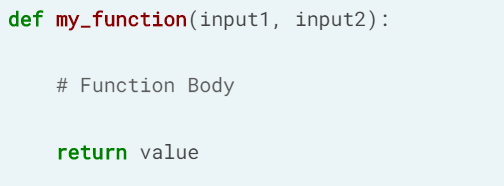

In [14]:
def diff_money(row, pattern):
    icost = row['Initial Cost']
    tef = row['Total Est. Fee']
    
    if bool(pattern.match(icost)) and bool(pattern.match(tef)):
        icost = icost.replace("$", "")
        tef = tef.replace("$", "")
        
        icost = float(icost)
        tef = float(icost)
        
        return icost - tef
    else:
        return(NaN)

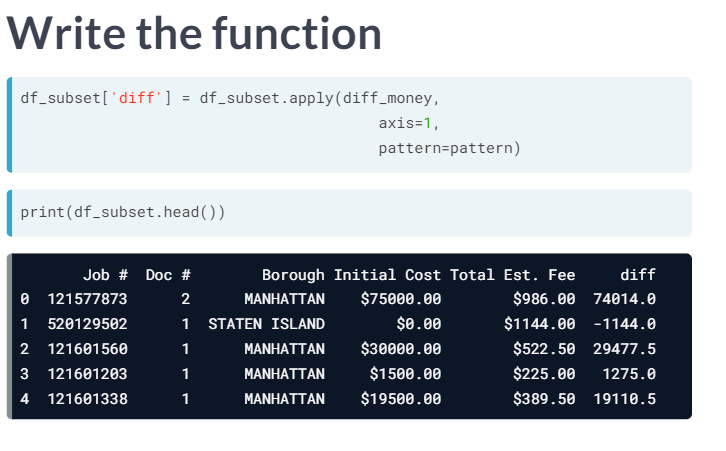

In [15]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode
0       16.99  1.01  Female     No  Sun  Dinner     2      0
1       10.34  1.66    Male     No  Sun  Dinner     3      1
2       21.01  3.50    Male     No  Sun  Dinner     3      1
3       23.68  3.31    Male     No  Sun  Dinner     2      1
4       24.59  3.61  Female     No  Sun  Dinner     4      0


In [17]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_bill.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_bill.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

AttributeError: 'float' object has no attribute 'replace'

# Duplicate and missing data

## Duplicate

Is a problematic as it can affect your analysis in undesirable ways. 

**.drop_duplictes()** method to drop duplicate data. 

## Missing data 

You can do this:
 - Leave as-is
 - Drop them
 - Fill missing value

Data can be missing randomly or there may be a systematic problem in your data that introduced missing values. 

To determine the number of **NaN** (missing values) in each column, we could use the **df.info()** method to see that info. 

In [18]:
tips_dropped = tips.dropna()
tips_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
recode        244 non-null category
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 12.4+ KB


To fill missing values we use the **fillna()** method.
 - with a user-provided value
 - use a summary statistic (mean or median)
 
To select multiple columns from a dataframe, we can use the double suqare bracket notation to use the **fillna()** method.

We can aslo fill missing values with a *test statistic*
 - But needs to be carefully using this (like mean).
 - Have to make sure the value you are filling in makes sense. 
 - Median is a better statistic in the presence of outliers.

In [19]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

NameError: name 'airquality' is not defined

# Testing with asserts

